Loading data files...

ANALYZING: Inkind Donations


/var/folders/8_/ls1ksvdx5x7bw17g9x7493pr0000gn/T/ipykernel_40820/1511980571.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/var/folders/8_/ls1ksvdx5x7bw17g9x7493pr0000gn/T/ipykernel_40820/1511980571.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Total donations: 6419
Years with data: [np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
Unique donors: 3131

Donations by Year:
   2018: 1434 donations
   2019: 1731 donations
   2020: 696 donations
   2021: 651 donations
   2022: 751 donations
   2023: 647 donations
   2024: 509 donations

ANALYZING: Monetary Donations
Total donations: 16437
Years with data: [np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
Unique donors: 6505

Donations by Year:
   2018: 1054 donations
   2019: 1129 donations
   2020: 887 donations
   2021: 2858 donations
   2022: 3855 donations
   2023: 3894 donations
   2024: 2760 donations

COMBINED DONATION COUNTS BY YEAR
 Year  Inkind  Monetary  Total
 2018    1434      1054   2488
 2019    1731      1129   2860
 2020     696       887   1583
 2021     651      2858   3509
 2022     751      3855   4606
 2023     647      3894   4541
 20

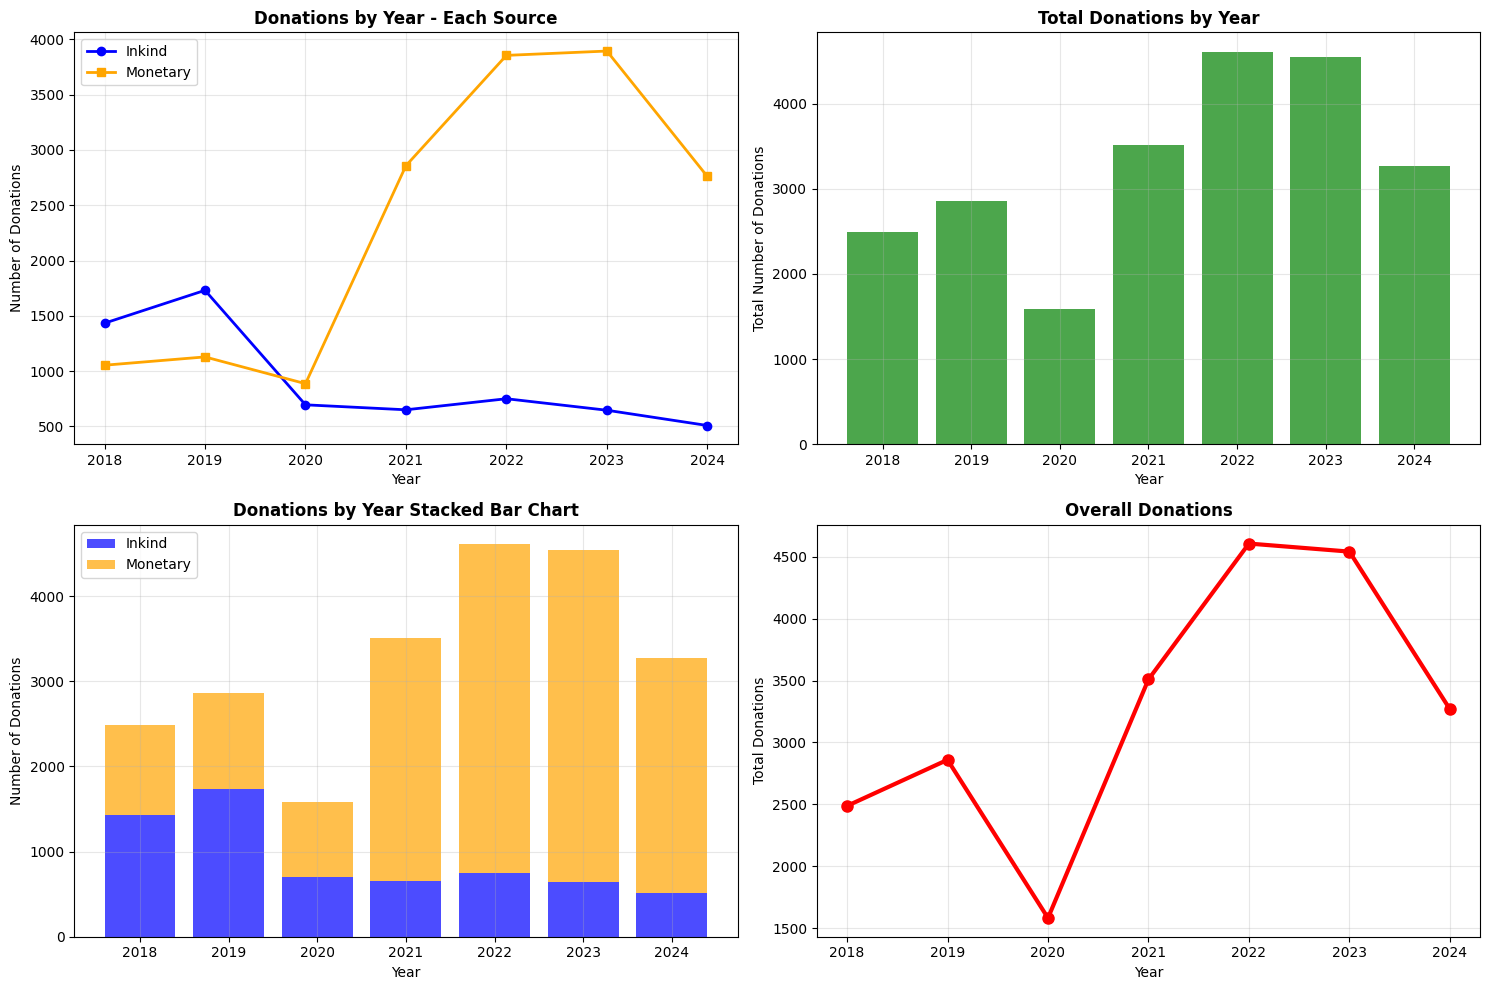

--------------------------------
SUMMARY OF DONATIONS
--------------------------------
Total donations across all types: 22,856
Highest year: 2022 (4,606 donations)
Lowest year: 2020 (1,583 donations)

Donor Types:
Monetary: 16,437 donations (71.9%)
Inkind: 6,419 donations (28.1%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def count_donations_by_year(df, source_name):
    print(f"\n{'='*50}")
    print(f"ANALYZING: {source_name}")
    print(f"{'='*50}")
    
    # Convert Entry Date to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    
    # Filter out 2025 data
    df = df[df['Year'] != 2025]
    
    # Count donations by year
    donations_by_year = df['Year'].value_counts().sort_index()
    
    print(f"Total donations: {len(df)}")
    print(f"Years with data: {sorted(df['Year'].unique())}")
    print(f"Unique donors: {df['Entity #'].nunique()}")
    
    print(f"\nDonations by Year:")
    for year, count in donations_by_year.items():
        print(f"   {year}: {count} donations")
    
    return donations_by_year


def analyze_donation_counts():
    # Load the data
    print("Loading data files...")
    inkind = pd.read_csv("RMHC_Inkind.csv")
    monetary = pd.read_csv("RMHC_2018-2025.csv")
    
    # Process each dataset
    inkind_counts = count_donations_by_year(inkind, "Inkind Donations")
    monetary_counts = count_donations_by_year(monetary, "Monetary Donations")
    
    # Create combined dataframe for analysis
    all_years = sorted(set(list(inkind_counts.index) + list(monetary_counts.index)))
    
    combined_data = pd.DataFrame({
        'Year': all_years,
        'Inkind': [inkind_counts.get(year, 0) for year in all_years],
        'Monetary': [monetary_counts.get(year, 0) for year in all_years]
    })
    
    # Calculate totals
    combined_data['Total'] =  combined_data['Inkind'] + combined_data['Monetary']
    
    print(f"\n{'='*60}")
    print("COMBINED DONATION COUNTS BY YEAR")
    print(f"{'='*60}")
    print(combined_data.to_string(index=False))  
    return combined_data

def create_visualizations(donation_data):
    """
    Create visualizations for donation counts
    """
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Donations by year for each source
    plt.subplot(2, 2, 1)
    plt.plot(donation_data['Year'], donation_data['Inkind'], marker='o', label='Inkind', linewidth=2, markersize=6, color= 'blue')
    plt.plot(donation_data['Year'], donation_data['Monetary'], marker='s', label='Monetary', linewidth=2, markersize=6, color= 'orange')
    plt.title('Donations by Year - Each Source', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Donations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Total donations by year
    plt.subplot(2, 2, 2)
    plt.bar(donation_data['Year'], donation_data['Total'], alpha=0.7, color='green')
    plt.title('Total Donations by Year', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Number of Donations')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Stacked bar chart
    plt.subplot(2, 2, 3)
    plt.bar(donation_data['Year'], donation_data['Inkind'], label='Inkind', alpha=0.7, color= 'blue')
    plt.bar(donation_data['Year'], donation_data['Monetary'], bottom=donation_data['Inkind'], label='Monetary', alpha=0.7, color= 'orange')
    plt.title('Donations by Year Stacked Bar Chart', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Donations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Donation trends
    plt.subplot(2, 2, 4)
    plt.plot(donation_data['Year'], donation_data['Total'], marker='o', linewidth=3, color='red', markersize=8)
    plt.title('Overall Donations', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Total Donations')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def print_summary_statistics(donation_data):
    """
    Print summary statistics
    """
    print("--------------------------------")
    print("SUMMARY OF DONATIONS")
    print("--------------------------------")
    print(f"Total donations across all types: {donation_data['Total'].sum():,}")
    print(f"Highest year: {donation_data.loc[donation_data['Total'].idxmax(), 'Year']} ({donation_data['Total'].max():,} donations)")
    print(f"Lowest year: {donation_data.loc[donation_data['Total'].idxmin(), 'Year']} ({donation_data['Total'].min():,} donations)")
    #print(f"Average donations per year: {donation_data['Total'].mean():.0f}")
    
    # Show which source contributes most
    total_by_source = {
        'Inkind': donation_data['Inkind'].sum(),
        'Monetary': donation_data['Monetary'].sum()
    }
    
    print(f"\nDonor Types:")
    for source, count in sorted(total_by_source.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / sum(total_by_source.values())) * 100
        print(f"{source}: {count:,} donations ({percentage:.1f}%)")

# Main execution
if __name__ == "__main__":
    # Analyze donation counts
    donation_data = analyze_donation_counts()
    
    # Create visualizations
    create_visualizations(donation_data)
    
    # Print summary
    print_summary_statistics(donation_data)


ANALYZING: Inkind Donations

IMPROVED CHURN & RETENTION ANALYSIS: Inkind Donations


/var/folders/8_/ls1ksvdx5x7bw17g9x7493pr0000gn/T/ipykernel_40820/2658629626.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


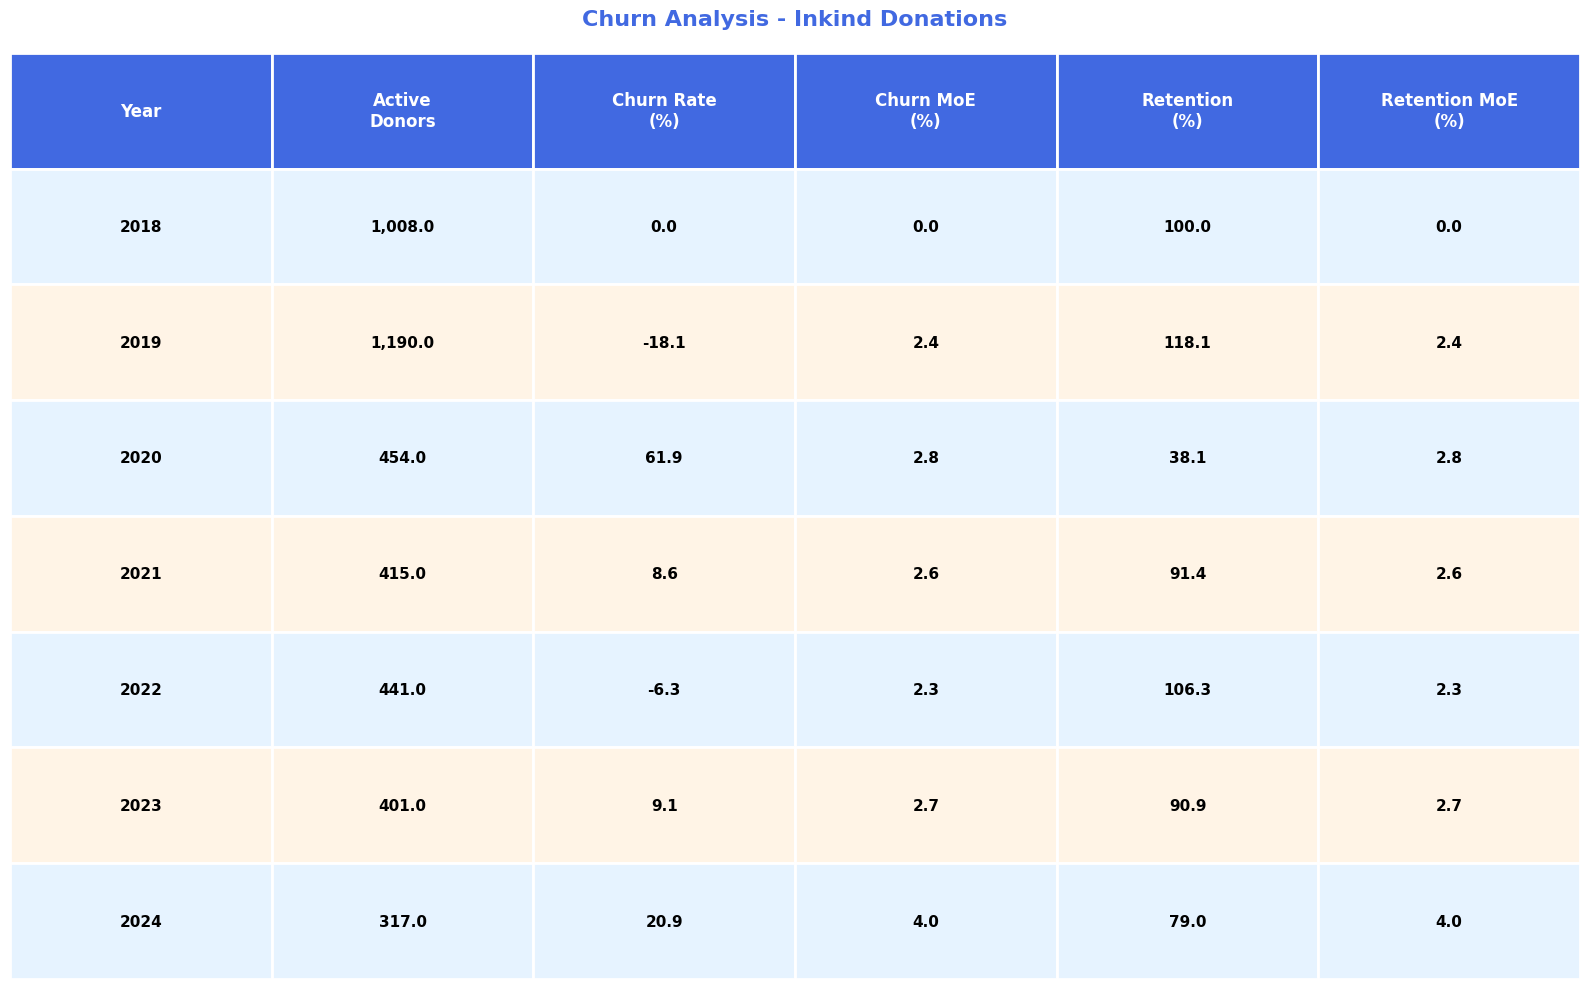


CHURN ANALYSIS TABLE - Inkind Donations
Year   Active   Churn Rate   Churn MoE  Retention    Retention MoE
----------------------------------------------------------------------------------------------------
2018.0 1008.0   0.00         0.00       100.00       0.00        
2019.0 1190.0   -18.06       2.37       118.06       2.37        
2020.0 454.0    61.85        2.76       38.15        2.76        
2021.0 415.0    8.59         2.58       91.41        2.58        
2022.0 441.0    -6.27        2.33       106.27       2.33        
2023.0 401.0    9.07         2.68       90.93        2.68        
2024.0 317.0    20.95        3.98       79.05        3.98        


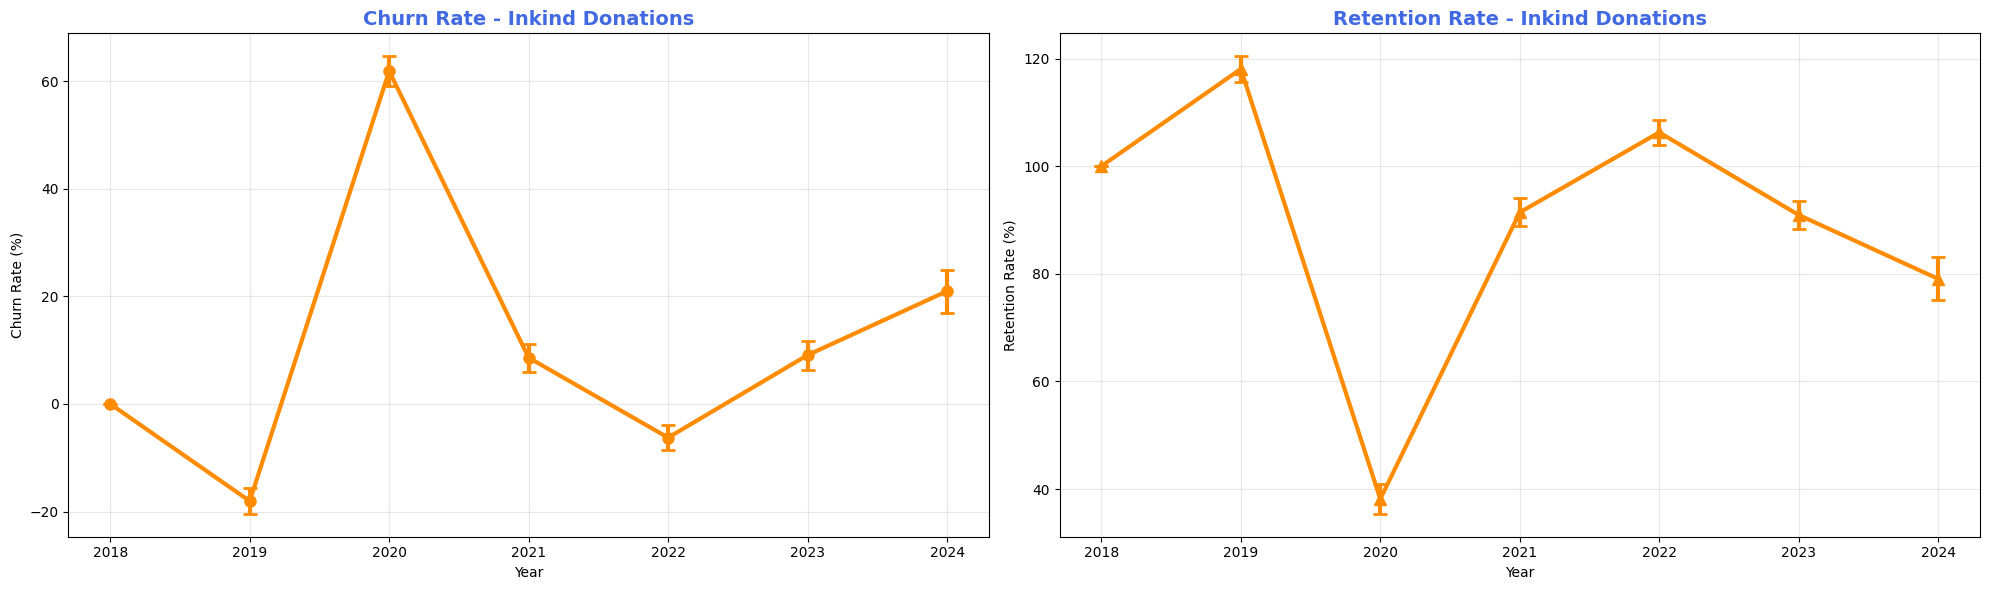


ANALYZING: Monetary Donations

IMPROVED CHURN & RETENTION ANALYSIS: Monetary Donations


/var/folders/8_/ls1ksvdx5x7bw17g9x7493pr0000gn/T/ipykernel_40820/2658629626.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


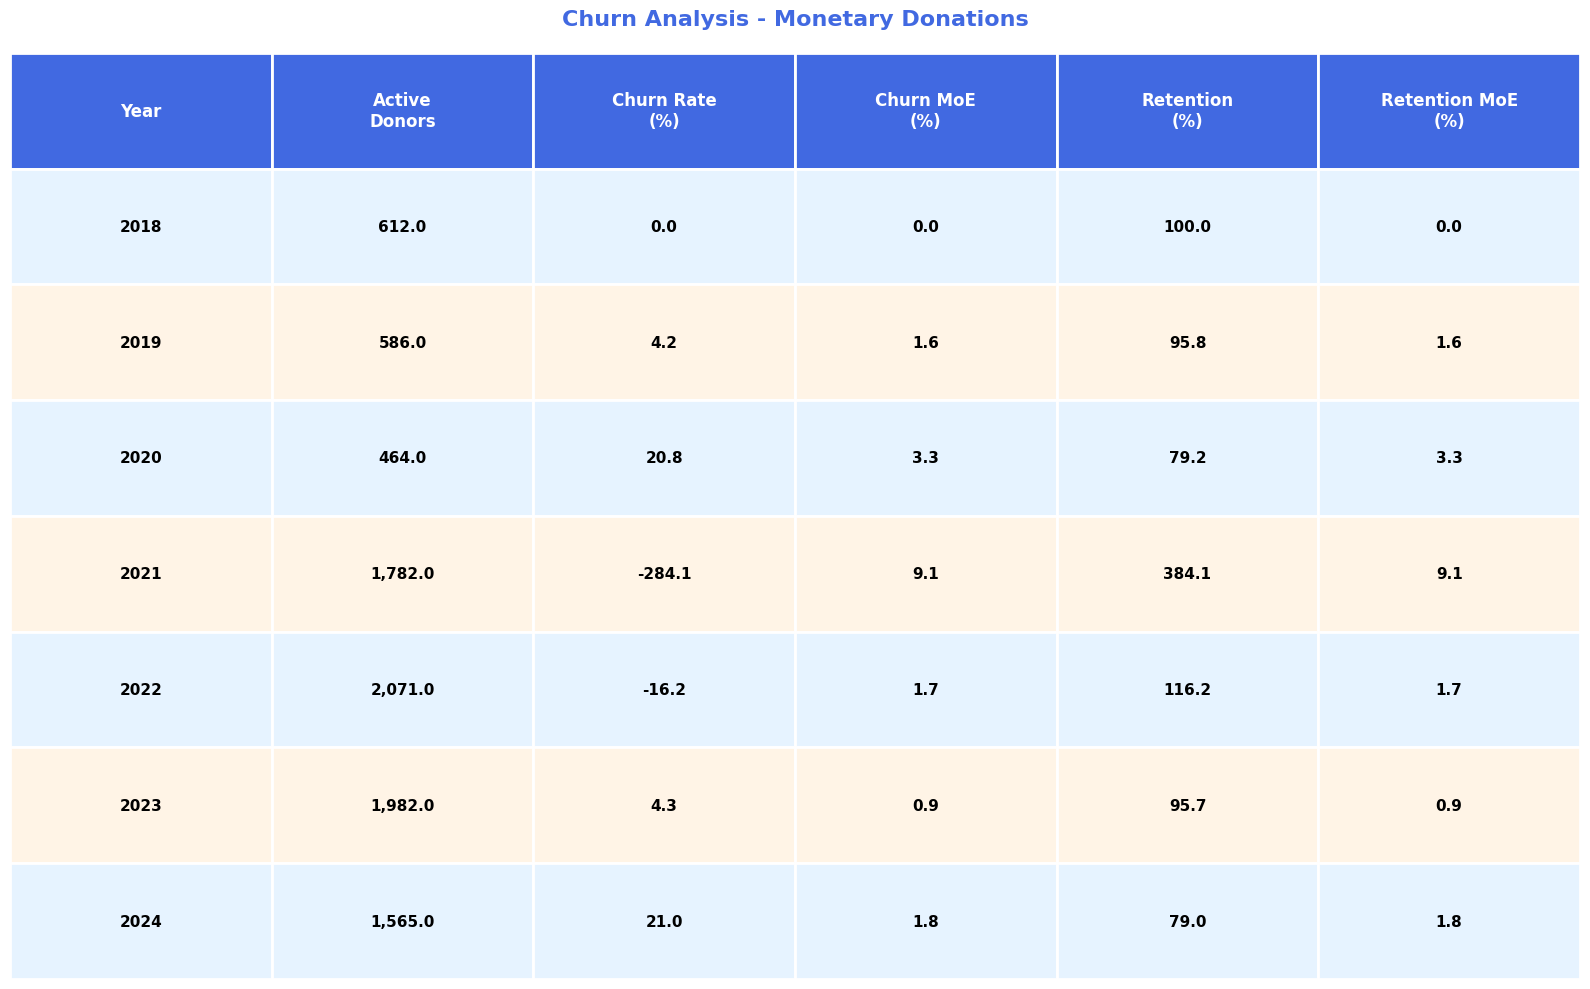


CHURN ANALYSIS TABLE - Monetary Donations
Year   Active   Churn Rate   Churn MoE  Retention    Retention MoE
----------------------------------------------------------------------------------------------------
2018.0 612.0    0.00         0.00       100.00       0.00        
2019.0 586.0    4.25         1.60       95.75        1.60        
2020.0 464.0    20.82        3.29       79.18        3.29        
2021.0 1782.0   -284.05      9.10       384.05       9.10        
2022.0 2071.0   -16.22       1.71       116.22       1.71        
2023.0 1982.0   4.30         0.87       95.70        0.87        
2024.0 1565.0   21.04        1.79       78.96        1.79        


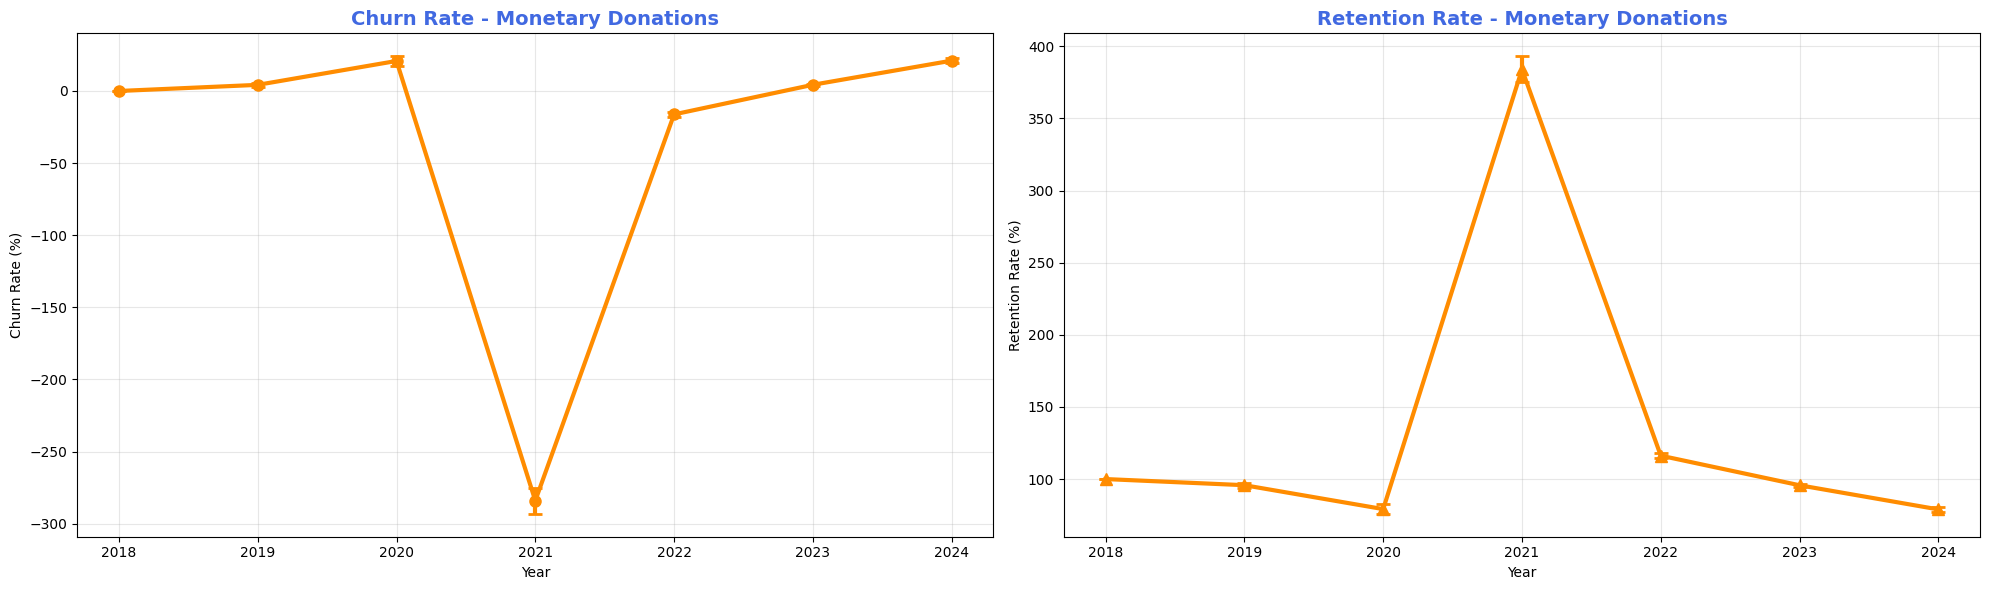

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def calculate_moe(n, p, confidence=0.95):
    if n == 0:
        return 0
    z = stats.norm.ppf((1 + confidence) / 2)
    if p <= 0:
        # used to catch negative churn rates
        abs_p = abs(p)
        if abs_p <= 1:
            se = np.sqrt((abs_p * (1 - abs_p)) / n)
        else:
            se = np.sqrt(1 / n)  
    elif p > 1:
        # used to catch positive retention rates
        base_se = np.sqrt((1 * (1 - 1)) / n)  
        excess = p - 1
        if excess <= 1:
            excess_se = np.sqrt((excess * (1 - excess)) / n)
        else:
            excess_se = np.sqrt(1 / n) 
        se = base_se + excess_se
    else:
        se = np.sqrt((p * (1 - p)) / n)
    
    margin = z * se
    #convert to percentages
    return margin * 100  

def calculate_churn_retention_improved(df, source_name):
    print(f"\n{'='*60}")
    print(f"IMPROVED CHURN & RETENTION ANALYSIS: {source_name}")
    print(f"{'='*60}")
    
    # Convert Entry Date to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    
    # Filter out 2025 data
    df = df[df['Year'] != 2025]
    
    # Get active years for each donor
    active_years = df.groupby('Donor Name')['Year'].unique().reset_index()
    active_years['Active Years'] = active_years['Year'].apply(lambda x: sorted(x))
    
    # Calculate churn data
    churn_data = []
    all_years = sorted(df['Year'].unique())
    
    for i, year in enumerate(all_years):
        if i == 0:  # First year - no churn rate possible
            active_donors = sum(1 for years in active_years['Active Years'] if year in years)
            churn_data.append({
                'Year': year,
                'Active_Donors': active_donors,
                'Churn_Rate': 0.0,
                'Churn_MoE': 0.0,
                'Retention_Rate': 100.0,
                'Retention_MoE': 0.0,
                'New_Donors': active_donors,
                'Churned_Donors': 0,
                'Net_Change': 0
            })
        else:
            previous_year = all_years[i-1]
            
            # Count donors active in previous year
            beginning_donors = sum(1 for years in active_years['Active Years'] if previous_year in years)
            
            # Count donors active in current year
            end_donors = sum(1 for years in active_years['Active Years'] if year in years)
            
            # Count new donors this year
            new_donors = sum(1 for years in active_years['Active Years'] 
                           if year in years and previous_year not in years)
            
            # Calculates churn and retention rates
            if beginning_donors > 0:
                churn_rate = ((beginning_donors - end_donors) / beginning_donors) * 100
                retention_rate = (end_donors / beginning_donors) * 100
                
                # Calculate proportions for margin of error
                churn_proportion = (beginning_donors - end_donors) / beginning_donors
                retention_proportion = end_donors / beginning_donors
                
                # Calculate margins of error using improved function
                churn_moe = calculate_moe(beginning_donors, churn_proportion)
                retention_moe = calculate_moe(beginning_donors, retention_proportion)
            else:
                churn_rate = 0
                retention_rate = 100
                churn_moe = 0
                retention_moe = 0

            
            net_change = end_donors - beginning_donors
            
            churn_data.append({
                'Year': year,
                'Active_Donors': end_donors,
                'Churn_Rate': round(churn_rate, 2),
                'Churn_MoE': round(churn_moe, 2),  
                'Retention_Rate': round(retention_rate, 2),
                'Retention_MoE': round(retention_moe, 2),
                'New_Donors': new_donors,
                'Churned_Donors': beginning_donors - end_donors,
                'Net_Change': net_change
            })
    
    return pd.DataFrame(churn_data)

def create_graphic_churn_table(churn_df, source_name):
    """Create a beautiful graphic table with royal blue and orange colors"""
    
    # Define colors
    royal_blue = '#4169E1'
    orange = '#FF8C00'
    light_blue = '#E6F3FF'
    light_orange = '#FFF4E6'
    
    # Create figure for the table
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare data for the table
    table_data = []
    headers = ['Year', 'Active\nDonors', 'Churn Rate\n(%)', 'Churn MoE\n(%)', 
                'Retention\n(%)', 'Retention MoE\n(%)']
    
    for _, row in churn_df.iterrows():
        table_data.append([
            f"{row['Year']:.0f}",
            f"{row['Active_Donors']:,}",
            f"{row['Churn_Rate']:.1f}",
            f"{row['Churn_MoE']:.1f}",
            f"{row['Retention_Rate']:.1f}",
            f"{row['Retention_MoE']:.1f}"
        ])
    
    # Create the table
    table = ax.table(cellText=table_data, colLabels=headers, 
                    cellLoc='center', loc='center',
                    bbox=[0, 0, 1, 1])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2.5)
    
    # Color the header with royal blue
    for i in range(len(headers)):
        table[(0, i)].set_facecolor(royal_blue)
        table[(0, i)].set_text_props(weight='bold', color='white', size=12)
    
    # Color alternating rows with light blue and light orange
    for i in range(1, len(table_data) + 1):
        for j in range(len(headers)):
            if i % 2 == 0:
                table[(i, j)].set_facecolor(light_orange)
            else:
                table[(i, j)].set_facecolor(light_blue)
            
            # Make text bold for better readability
            table[(i, j)].set_text_props(weight='bold', size=11)
    
    # Add borders
    for i in range(len(table_data) + 1):
        for j in range(len(headers)):
            table[(i, j)].set_edgecolor('white')
            table[(i, j)].set_linewidth(2)
    
    # Set title
    ax.set_title(f'Churn Analysis - {source_name}', fontsize=16, fontweight='bold', 
                color=royal_blue, pad=20)
    
    plt.tight_layout()
    plt.show()

def create_churn_tables(churn_df, source_name):
    """Create formatted tables for churn analysis"""
    
    # Create graphic tables
    create_graphic_churn_table(churn_df, source_name)
    
    # Also print text version for console
    print(f"\n{'='*100}")
    print(f"CHURN ANALYSIS TABLE - {source_name}")
    print(f"{'='*100}")
    
    print(f"{'Year':<6} {'Active':<8} {'Churn Rate':<12} {'Churn MoE':<10} {'Retention':<12} {'Retention MoE':<12}")
    print("-" * 100)
    
    for _, row in churn_df.iterrows():
        print(f"{row['Year']:<6} {row['Active_Donors']:<8} {row['Churn_Rate']:<12.2f} {row['Churn_MoE']:<10.2f} "
              f"{row['Retention_Rate']:<12.2f} {row['Retention_MoE']:<12.2f}")

def create_improved_visualizations(churn_df, source_name):
    # Define colors
    royal_blue = '#4169E1'
    orange = '#FF8C00'
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # 1. Churn Rate Over Time with Error Bars
    ax1.errorbar(churn_df['Year'], churn_df['Churn_Rate'], 
                yerr=churn_df['Churn_MoE'], marker='o', linewidth=3, 
                markersize=8, color=orange, capsize=5, capthick=2)
    ax1.set_title(f'Churn Rate - {source_name}', fontsize=14, fontweight='bold', color=royal_blue)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Churn Rate (%)')
    ax1.grid(True, alpha=0.3)
    
    
    # 2. Retention Rate Over Time with Error Bars
    ax2.errorbar(churn_df['Year'], churn_df['Retention_Rate'], 
                yerr=churn_df['Retention_MoE'], marker='^', linewidth=3, 
                markersize=8, color=orange, capsize=5, capthick=2)
    ax2.set_title(f'Retention Rate - {source_name}', fontsize=14, fontweight='bold', color=royal_blue)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Retention Rate (%)')
    ax2.grid(True, alpha=0.3)
    
    
    plt.tight_layout()
    plt.show()

def analyze_all_sources_improved():
    # Load data
    inkind = pd.read_csv("RMHC_Inkind.csv")
    monetary = pd.read_csv("RMHC_2018-2025.csv")
    
    # Analyze each source
    sources = [
        (inkind, "Inkind Donations"),
        (monetary, "Monetary Donations")
    ]
    
    all_results = {}
    
    for df, source_name in sources:
        print(f"\n{'='*80}")
        print(f"ANALYZING: {source_name}")
        print(f"{'='*80}")
        
        # Calculate churn and retention with improved method
        churn_df = calculate_churn_retention_improved(df, source_name)
        all_results[source_name] = churn_df
        
        # Create tables
        create_churn_tables(churn_df, source_name)
        
        # Create improved visualizations
        create_improved_visualizations(churn_df, source_name)
    return all_results



if __name__ == "__main__":
    # Run the improved analysis
    improved_results = analyze_all_sources_improved() 


ALL-TIME EVENT ANALYSIS


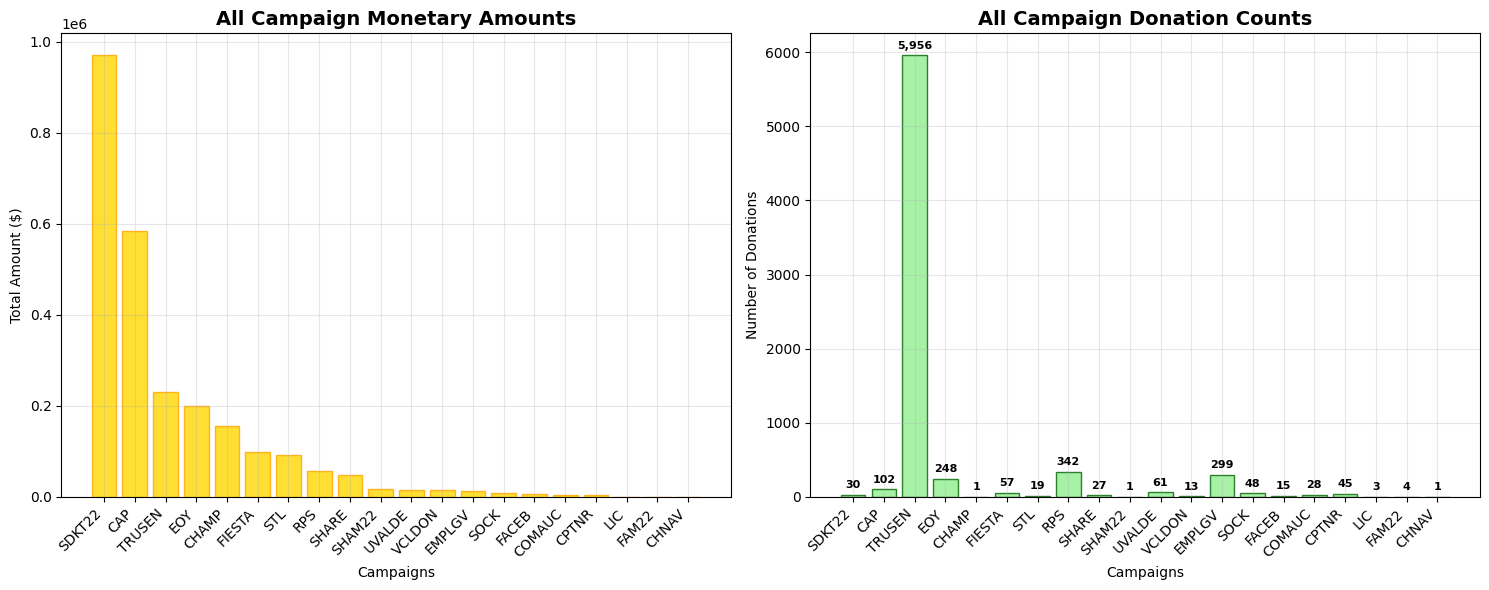


All-Time Event Summary:
Event                     Total Amount    Donations    monetary    
------------------------------------------------------------------------------------------
SDKT22                    $970,500.00     30          $970,500.00  $970,500.00 
CAP                       $585,502.32     102         $585,502.32  $585,502.32 
TRUSEN                    $230,479.27     5956        $230,479.27  $230,479.27 
EOY                       $200,669.76     248         $200,669.76  $200,669.76 
CHAMP                     $155,500.00     1           $155,500.00  $155,500.00 
FIESTA                    $99,906.87      57          $99,906.87   $99,906.87  
STL                       $92,000.00      19          $92,000.00   $92,000.00  
RPS                       $57,399.40      342         $57,399.40   $57,399.40  
SHARE                     $47,355.14      27          $47,355.14   $47,355.14  
SHAM22                    $17,270.50      1           $17,270.50   $17,270.50  
UVALDE          

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def stando_campaigns(camp):
    #standardize campaign names
    campaign_strng = str(camp).strip().upper()
    
    #customizeyour tags here if you need to 
    campaign_groups = {
        'EOY': ['EOY20', 'EOY21', 'EOY22', 'EOY 23'],
        
        'STL': ['STL23', 'STL24'],
        
        # Chair events
        'RPS': ['RPS-E', 'RPS-C', 'RPS-W'],
        
        # Clay events
        'SOCK': ['SOCK', 'SOCK22', 'SOCK24'],

        'FIESTA': ['FIES22', 'FIES23', 'FIES24', 'FIESTA', 'MEDALS']

    }
    
    # looks to see if campaign matches any of the groups above and if so returns the groups name as its id
    for x, patterns in campaign_groups.items():
        for pattern in patterns:
            if pattern in campaign_strng:
                return x
    return campaign_strng

def analyze_all_campaigns():
    """
    Analyze all campaigns across all years
    """
    print(f"\n{'='*80}")
    print("ALL-TIME EVENT ANALYSIS")
    print(f"{'='*80}")
    
    # Load data
    monetary = pd.read_csv("RMHC_2018-2025.csv")
    
    # Filter out AbbVie if needed
    monetary = monetary[monetary['Donor Name'] != 'AbbVie, Inc.']
    
    # Combine all data
    all_data = pd.concat([
        monetary[['Date', 'Campaign', 'Gift Value', 'Donor Name']].assign(Source='monetary'),
    ], ignore_index=True)
    
    # Standardize event names (only specific groupings)
    all_data['Standardized_Campaign'] = all_data['Campaign'].apply(stando_campaigns)
    all_data = all_data[all_data['Standardized_Campaign'] != 'NAN']
    
    # Group by standardized event
    campaign_summary = all_data.groupby('Standardized_Campaign').agg({
        'Gift Value': ['sum', 'count'],
        'Source': 'nunique'
    }).reset_index()
    
    # Flatten column names
    campaign_summary.columns = ['Campaign', 'Total_Amount', 'Donation_Count', 'Source_Count']
    
    # Sort by total amount
    campaign_summary = campaign_summary.sort_values('Total_Amount', ascending=False)
    
    # Create visualization - COMBINED DATA ONLY
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. All-time Combined Event Monetary Amounts
    campaigns = campaign_summary['Campaign'].head(20) 
    amounts = campaign_summary['Total_Amount'].head(20)
    
    bars1 = ax1.bar(range(len(campaigns)), amounts, color='gold', alpha=0.8, edgecolor='orange')
    ax1.set_title('All Campaign Monetary Amounts', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Campaigns')
    ax1.set_ylabel('Total Amount ($)')
    ax1.set_xticks(range(len(campaigns)))
    ax1.set_xticklabels(campaigns, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels

    # 2. All-time Combined Event Donation Counts
    counts = campaign_summary['Donation_Count'].head(20)
    
    bars2 = ax2.bar(range(len(campaigns)), counts, color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    ax2.set_title('All Campaign Donation Counts', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Campaigns')
    ax2.set_ylabel('Number of Donations')
    ax2.set_xticks(range(len(campaigns)))
    ax2.set_xticklabels(campaigns, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars2, counts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate organizations and households amounts for each event
    monetary_data = all_data[all_data['Source'] == 'monetary']
    
    monetary_summary = monetary_data.groupby('Standardized_Campaign')['Gift Value'].sum().reset_index()
    
    # Add organizations and households amounts to event_summary
    campaign_summary['organizations_Amount'] = 0.0
    campaign_summary['Households_Amount'] = 0.0
    
    for idx, row in campaign_summary.iterrows():
        campaign_name = row['Campaign']
        
        # Get organizations amount
        comp_match = monetary_summary[monetary_summary['Standardized_Campaign'] == campaign_name]
        if len(comp_match) > 0:
            campaign_summary.at[idx, 'organizations_Amount'] = comp_match['Gift Value'].iloc[0]
        
        # Get households amount
        house_match = monetary_summary[monetary_summary['Standardized_Campaign'] == campaign_name]
        if len(house_match) > 0:
            campaign_summary.at[idx, 'Households_Amount'] = house_match['Gift Value'].iloc[0]
    
    # Print all-time summary with extra columns
    print(f"\nAll-Time Event Summary:")
    print(f"{'Event':<25} {'Total Amount':<15} {'Donations':<12} {'monetary':<12}")
    print("-" * 90)
    
    for _, row in campaign_summary.iterrows():
        print(f"{row['Campaign']:<25} ${row['Total_Amount']:<14,.2f} {row['Donation_Count']:<12}"
              f"${row['organizations_Amount']:<11,.2f} ${row['Households_Amount']:<11,.2f}")
    
    # Print all-time summary statistics
    print(f"\nAll-Time Event Summary:")
    print(f"Total Events: {len(campaign_summary)}")
    print(f"Total Amount: ${campaign_summary['Total_Amount'].sum():,.2f}")
    print(f"organizations Total: ${campaign_summary['organizations_Amount'].sum():,.2f}")
    print(f"Households Total: ${campaign_summary['Households_Amount'].sum():,.2f}")
    print(f"Total Donations: {campaign_summary['Donation_Count'].sum():,}")
    print(f"Top Event: {campaign_summary.iloc[0]['Campaign']} (${campaign_summary.iloc[0]['Total_Amount']:,.2f})")

# Main execution
if __name__ == "__main__":
    analyze_all_campaigns() 


ALL-TIME EVENT ANALYSIS


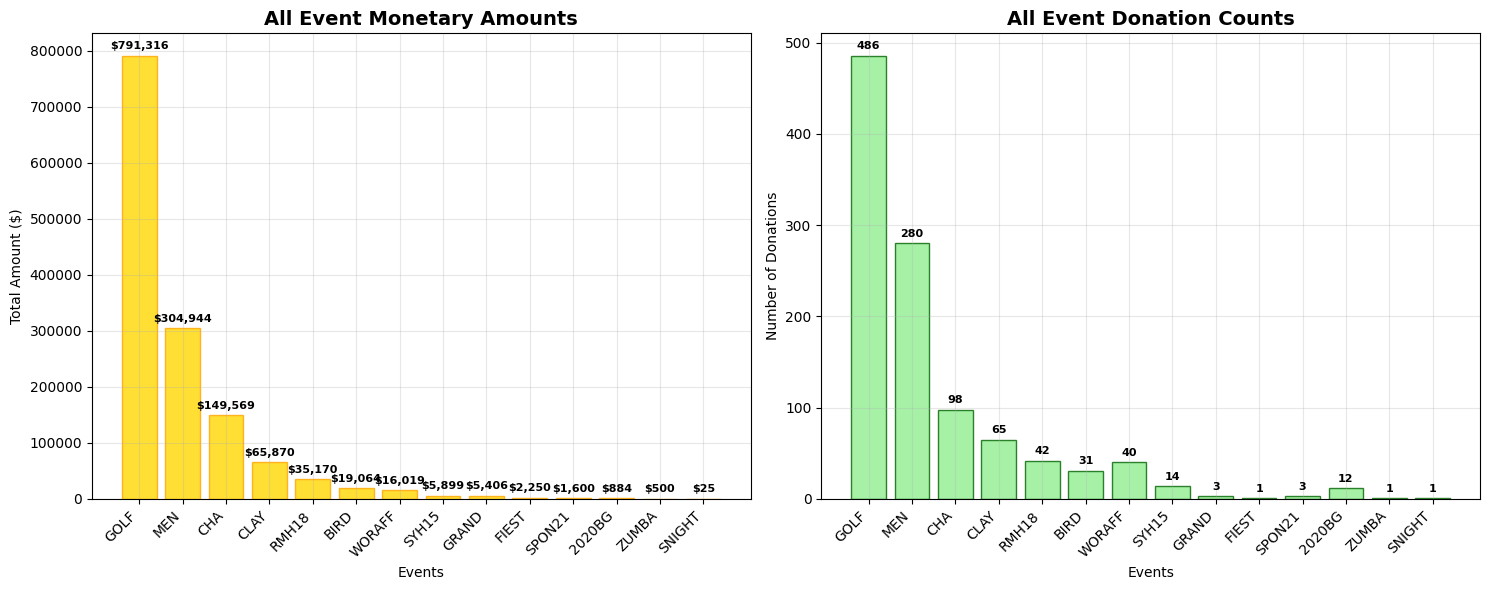


All-Time Event Summary:
Event                     Total Amount    Donations    organizations Households  
------------------------------------------------------------------------------------------
GOLF                      $791,315.92     486         $740,597.92  $50,718.00  
MEN                       $304,944.11     280         $272,236.62  $32,707.49  
CHA                       $149,569.01     98          $130,172.46  $19,396.55  
CLAY                      $65,869.84      65          $49,664.12   $16,205.72  
RMH18                     $35,170.00      42          $26,600.00   $8,570.00   
BIRD                      $19,063.55      31          $13,643.55   $5,420.00   
WORAFF                    $16,018.63      40          $207.25      $15,811.38  
SYH15                     $5,898.84       14          $5,857.84    $41.00      
GRAND                     $5,406.00       3           $5,406.00    $0.00       
FIEST                     $2,250.00       1           $2,250.00    $0.00       
SP

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def stando_events(ename):
    """
    Standardize event names by grouping similar events together
    Easy to customize by adding more patterns
    """
    if pd.isna(ename) or ename == '':
        return 'No Event'
    
    event_str = str(ename).strip().upper()
    
    # Define event groupings - EASY TO CUSTOMIZE
    event_groups = {
        # Men who cook events
        'MEN': ['MWC23', 'MEN22', 'MWC24'],
        
        # Golf events  
        'GOLF': ['GOL18', 'GOL19', 'GOL20', 'GOLF23', 'GOLF22', 'GOLF21', 'GOLF24', 'GOLF25'],
        
        # Chair events
        'CHA': ['CHA18', 'CHA19'],
        
        # Clay events
        'CLAY': ['CLAY24', 'CLAY25'],

        'BIRD' : ['19BIR', '18BIR', 'BIRD9', 'BIRD20']
    }
    
    # Check if event matches any specific group
    for group_name, patterns in event_groups.items():
        for pattern in patterns:
            if pattern in event_str:
                return group_name
    
    # If no match found, return the original name (cleaned but not grouped)
    return event_str

def analyze_all_events():
    """
    Analyze all events across all years
    """
    print(f"\n{'='*80}")
    print("ALL-TIME EVENT ANALYSIS")
    print(f"{'='*80}")
    
    # Load data
    organizations = pd.read_csv("RMHC_organizations_corrected.csv")
    households = pd.read_csv("RMHC_Households_corrected.csv")
    
    # Filter out AbbVie if needed
    organizations = organizations[organizations['Donor Name'] != 'AbbVie, Inc.']
    households = households[households['Donor Name'] != 'AbbVie, Inc.']
    
    # Combine all data
    all_data = pd.concat([
        organizations[['Date', 'Event', 'Gift Value', 'Donor Name']].assign(Source='organizations'),
        households[['Date', 'Event', 'Gift Value', 'Donor Name']].assign(Source='Households'),
    ], ignore_index=True)
    
    # Standardize event names (only specific groupings)
    all_data['Standardized_Event'] = all_data['Event'].apply(stando_events)
    all_data = all_data[all_data['Standardized_Event'] != 'No Event']
    
    # Group by standardized event
    event_summary = all_data.groupby('Standardized_Event').agg({
        'Gift Value': ['sum', 'count'],
        'Source': 'nunique'
    }).reset_index()
    
    # Flatten column names
    event_summary.columns = ['Event', 'Total_Amount', 'Donation_Count', 'Source_Count']
    
    # Sort by total amount
    event_summary = event_summary.sort_values('Total_Amount', ascending=False)
    
    # Create visualization - COMBINED DATA ONLY
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. All-time Combined Event Monetary Amounts
    events = event_summary['Event'].head(20) 
    amounts = event_summary['Total_Amount'].head(20)
    
    bars1 = ax1.bar(range(len(events)), amounts, color='gold', alpha=0.8, edgecolor='orange')
    ax1.set_title('All Event Monetary Amounts', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Events')
    ax1.set_ylabel('Total Amount ($)')
    ax1.set_xticks(range(len(events)))
    ax1.set_xticklabels(events, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, amount in zip(bars1, amounts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(amounts)*0.01,
                f'${amount:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    # 2. All-time Combined Event Donation Counts
    counts = event_summary['Donation_Count'].head(20)
    
    bars2 = ax2.bar(range(len(events)), counts, color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    ax2.set_title('All Event Donation Counts', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Events')
    ax2.set_ylabel('Number of Donations')
    ax2.set_xticks(range(len(events)))
    ax2.set_xticklabels(events, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars2, counts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate organizations and households amounts for each event
    organizations_data = all_data[all_data['Source'] == 'organizations']
    households_data = all_data[all_data['Source'] == 'Households']
    
    organizations_summary = organizations_data.groupby('Standardized_Event')['Gift Value'].sum().reset_index()
    households_summary = households_data.groupby('Standardized_Event')['Gift Value'].sum().reset_index()
    
    # Add organizations and households amounts to event_summary
    event_summary['organizations_Amount'] = 0.0
    event_summary['Households_Amount'] = 0.0
    
    for idx, row in event_summary.iterrows():
        event_name = row['Event']
        
        # Get organizations amount
        comp_match = organizations_summary[organizations_summary['Standardized_Event'] == event_name]
        if len(comp_match) > 0:
            event_summary.at[idx, 'organizations_Amount'] = comp_match['Gift Value'].iloc[0]
        
        # Get households amount
        house_match = households_summary[households_summary['Standardized_Event'] == event_name]
        if len(house_match) > 0:
            event_summary.at[idx, 'Households_Amount'] = house_match['Gift Value'].iloc[0]
    
    # Print all-time summary with extra columns
    print(f"\nAll-Time Event Summary:")
    print(f"{'Event':<25} {'Total Amount':<15} {'Donations':<12} {'organizations':<12} {'Households':<12}")
    print("-" * 90)
    
    for _, row in event_summary.iterrows():
        print(f"{row['Event']:<25} ${row['Total_Amount']:<14,.2f} {row['Donation_Count']:<12}"
              f"${row['organizations_Amount']:<11,.2f} ${row['Households_Amount']:<11,.2f}")
    
    # Print all-time summary statistics
    print(f"\nAll-Time Event Summary:")
    print(f"Total Events: {len(event_summary)}")
    print(f"Total Amount: ${event_summary['Total_Amount'].sum():,.2f}")
    print(f"organizations Total: ${event_summary['organizations_Amount'].sum():,.2f}")
    print(f"Households Total: ${event_summary['Households_Amount'].sum():,.2f}")
    print(f"Total Donations: {event_summary['Donation_Count'].sum():,}")
    print(f"Top Event: {event_summary.iloc[0]['Event']} (${event_summary.iloc[0]['Total_Amount']:,.2f})")

# Main execution
if __name__ == "__main__":
    # Analyze all events
    analyze_all_events()
    